In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_titanic = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_titanic[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### X 범주형 , Y 범주형 : 주로 독립성 증명 FEAT. chi2_contingency



#### 선정변수 : 'Pclass','Survived'

    - 분석 내용 : 선실 등급에 따라 생존 여부가 달라지는가?
        - 귀무가설 : 선실 등급에 따라 생존 여부가 달라지지 않는다.
        - 대립가설 : 선실 등급에 따라 생존 여부가 달라진다.
    
    - 분석 결론 :(기준:p-value 0.05) / P.value < 0.05
                statistic=102.88898875696056, pvalue=4.549251711298793e-23
        - 통계 결론 : 대립가설 참 
        - 사실 결론 : 선실 등급에 따라 생존 여부가 달라진다.

In [4]:
df_titanic[['Pclass','Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

In [12]:
df_titanic_Pclass = df_titanic[['Pclass','Survived']].astype(str)

df_titanic_Pclass.info()

In [14]:
df_titanic_Pclass.describe()

,Pclass,Survived
count,891,891
unique,3,2
top,3,0
freq,491,549


In [8]:
df_titanic_Pclass.isnull().sum()

Pclass      0
Survived    0
dtype: int64

In [9]:
df_titanic_Pclass_pivot = pd.pivot_table(data=df_titanic_Pclass, index='Pclass', columns='Survived', aggfunc=len)
df_titanic_Pclass_pivot # 피봇 테이블을 만든 이유는 계산된 데이터 프레임을 넣으면 안됨 집약함수를 만들었음

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [11]:
stats.chi2_contingency(observed=df_titanic_Pclass_pivot, correction=True) ##data는 집계된 data로, correction는 자유도

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

선정변수 : 'Sex','Survived'

    - 분석 내용 : 성별에 따라 생존 여부가 달라지는가?
        - 귀무가설 : 성별에 따라 생존 여부가 달라지지 않는다.
        - 대립가설 : 성별에 따라 생존 여부가 달라진다.
    
    - 분석 결론 :(기준:p-value 0.05) / P.value < 0.05
                statistic=260.71702016732104, pvalue=1.1973570627755645e-58
        - 통계 결론 : 대립가설 참 
        - 사실 결론 : 성별에 생존 여부가 달라진다.

In [17]:
df_titanic_Sex = df_titanic[['Sex','Survived']]
df_titanic_Sex 

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [19]:
df_titanic_Sex.isnull().sum()

Sex         0
Survived    0
dtype: int64

In [22]:
df_titanic_Sex_pivot = pd.pivot_table(data=df_titanic_Sex, index='Sex', columns='Survived', aggfunc=len)
df_titanic_Sex_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
stats.chi2_contingency(observed=df_titanic_Sex_pivot, correction=True)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

### X:범주형 / Y:연속형 : 

#### 선정변수 : 'Age','Survived'

    - 분석 내용 : 나이에 따라 생존 여부가 달라지는가?
        - 귀무가설 : 나이에 따라 생존 여부가 달라지지 않는다.
        - 대립가설 : 성별에 따라 생존 여부가 달라진다.
    
    - 분석 결론 :(기준:p-value 0.05) / P.value < 0.05
                statistic=260.71702016732104, pvalue=1.1973570627755645e-58
        - 통계 결론 : 대립가설 참 
        - 사실 결론 : 성별에 생존 여부가 달라진다.


In [26]:
df_titanic_Age = df_titanic[['Age','Survived']]
df_titanic_Age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [29]:
df_titanic_Age.isnull().sum()

Age         0
Survived    0
dtype: int64

In [31]:
df_titanic_Age = df_titanic_Age.dropna()
df_titanic_Age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [30]:
df_titanic_Age.value_counts()

Age   Survived
21.0  0           19
28.0  0           18
18.0  0           17
25.0  0           17
22.0  0           16
                  ..
36.5  0            1
37.0  1            1
43.0  1            1
47.0  1            1
80.0  1            1
Length: 142, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

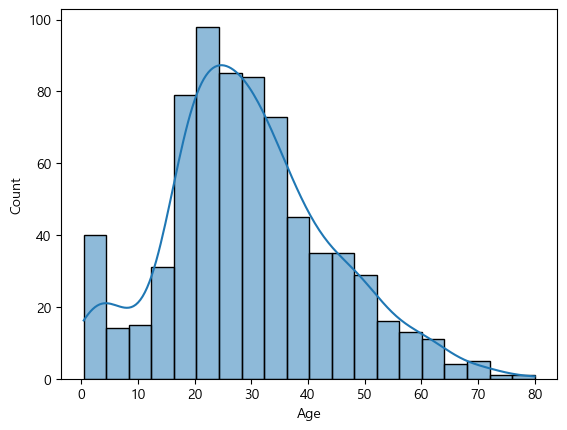

In [34]:
sns.histplot(data=df_titanic_Age, x='Age', kde=True)

In [35]:
df_titanic_Age['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [36]:
stats.shapiro(df_titanic_Age['Age'])
#  pvalue=7.340329943872348e-08이 0.05보다 작으므로 비정규 분포이다

ShapiroResult(statistic=0.981458306312561, pvalue=7.340329943872348e-08)

In [48]:
df_Yes = df_titanic_Age[df_titanic_Age['Survived'] == 0]
df_Yes

,Age,Survived
0,22.0,0
4,35.0,0
6,54.0,0
7,2.0,0
12,20.0,0
...,...,...
883,28.0,0
884,25.0,0
885,39.0,0
886,27.0,0


In [49]:
df_No = df_titanic_Age[df_titanic_Age['Survived'] == 1]
df_No

,Age,Survived
1,38.0,1
2,26.0,1
3,35.0,1
8,27.0,1
9,14.0,1
...,...,...
875,15.0,1
879,56.0,1
880,25.0,1
887,19.0,1


In [50]:
## 검증
stats.ranksums(df_Yes['Survived'], df_No['Survived'])

RanksumsResult(statistic=-22.71378620829394, pvalue=3.273848593437649e-114)